In [31]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Environment:

env = gym.make('Taxi-v3')
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [36]:
# Env Info:

action_size = env.action_space.n
print('Action Size: ', action_size)

state_size = env.observation_space.n
print('State Size: ', state_size)

Action Size:  6
State Size:  500


In [37]:
# Building Q Table:

q_table = np.zeros((state_size, action_size))
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [45]:
# Parameters:

EPISODES = 1000 # How many episodes agent will train
MAX_STEPS = 200 # Max Steps per episode

LEARNING_RATE = 0.7
GAMMA = 0.618

epsilon = 1.0

In [46]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()

  for _ in range(MAX_STEPS):

    env.render()

    if np.random.uniform(0, 1) < epsilon: 
      action = env.action_space.sample() # Pick Random Action

    else:
      action = np.argmax(q_table[state, :]) # Pick the best action for the current state s'

    new_state, reward, done, info = env.step(action)

    # Update Q Table:
    q_table[state, action] = q_table[state, action] + LEARNING_RATE * (reward + GAMMA * np.argmax(q_table[state, :]) - q_table[state, action])

    # Define new state:
    state = new_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break # Reached the goal
  
print('Average Reward: {}'.format(sum(rewards)/EPISODES))
print('=========================================================')
print('Q Table: \n ', q_table)

Streaming output truncated to the last 5000 lines.
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |

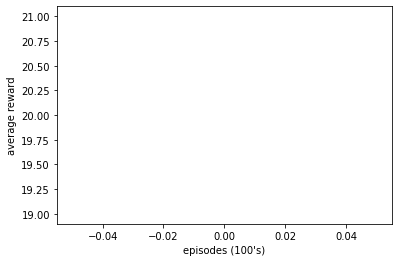

In [44]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()